In [1]:
from sklearn.linear_model import LogisticRegression
import numpy as np
import pandas as pd
from auxiliary.data_clean2 import *

In [2]:
# Read Data 
data = pd.read_csv('GSMArena_dataset_2020.csv', index_col=0)
data_features = data[all_features]

# Clean data
data_features = clean_data(data_features)

# Drop features
df = data_features
# drop # 1st line: key_index and 7th line: misc_price 
temp1 = df.values[:,1:8]
temp2 = df.values[:,9:]
td = np.concatenate((temp1,temp2),axis=1)

C:\Users\chengze\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (67,68,72,77,79,83) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\chengze\Desktop\UNSW\COMP9417\assignment\Great-Group-ML-master\ml_algorithms\auxiliary\data_clean2.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[feature] = s.str.extract(r"(\d+)")
C:\Users\chengze\Desktop\UNSW\COMP9417\assignment\Great-Group-ML-master\ml_algorithms\auxiliary\data_clean2.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docume

In [3]:
# Divide Y(price) into catagories
from sklearn.preprocessing import StandardScaler
from feature_selection import y_classify_five, y_classify
from sklearn.model_selection import train_test_split

mX = td
mY = df["misc_price"].astype("int").values.reshape(-1,1)

# Divide price into 3 catagories bt function y_classify()
tempList = []
mY = mY.reshape(-1)
for item in mY:
    tempList.append(y_classify(item))
mY = tempList

# Do standard scaler for data in X
sc = StandardScaler()
sc.fit(mX)
mX = sc.transform(mX)

#X_train_std = sc.transform(X_train)
#X_test_std = sc.transform(X_test)

# Split data into train, test
X_train, X_test, Y_train, Y_test = train_test_split(mX, mY, test_size=.2, random_state=0)


In [4]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
logistic_GS= LogisticRegression()
loss = cross_val_score(logistic_GS, X_train, Y_train, cv=5, scoring='neg_log_loss')

penaltys = ['l1','l2']
Cs = [1, 10, 100, 1000,10000]
solver = ['liblinear', 'newton-cg', 'sag', 'lbfgs']
tuned_parameters = dict(penalty = penaltys, C = Cs, solver = solver)

logistic_GS_penalty= LogisticRegression()
grid= GridSearchCV(logistic_GS_penalty, tuned_parameters,cv=5, scoring='neg_log_loss')
grid.fit(X_train,Y_train)

test_means = grid.cv_results_[ 'mean_test_score' ]
#print(-np.array(test_means).reshape(5,2,4))


C:\Users\chengze\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\chengze\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\chengze\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\chengze\anaconda3\lib\site

C:\Users\chengze\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\chengze\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\chengze\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\chengze\anaconda3\lib\site

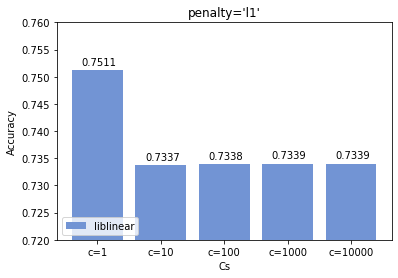

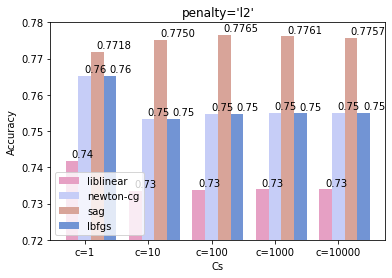

In [5]:
# plot
import matplotlib.pyplot as plt

def autolabel6(rects):
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x()+rect.get_width()/2.-0.25, height+0.001, '%0.6s' % float(height))

def autolabel4(rects):
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x()+rect.get_width()/2.-0.25, height+0.001, '%0.4s' % float(height))

def getAxis():
    width = 5
    num = 5
    axis = width/2
    x = []
    for i in range(5):
        x.append(axis)
        axis += width*num
    return np.array(x)
full_table = np.array(test_means).reshape(5,2,4)


# penalty = l1
plt.figure(0)
l1_list = -full_table[:,0,0]
#print(l1_list)
a = plt.bar(range(len(l1_list)), l1_list, tick_label=['c=1','c=10','c=100','c=1000','c=10000'], label='liblinear', fc='#7294d4')
plt.title('penalty=\'l1\'')
plt.xlabel('Cs')
plt.ylabel('Accuracy')
plt.ylim((0.72, 0.76))
plt.legend(loc = 'lower left')
autolabel6(a)
#plt.show()
plt.savefig('l1.png')


# penalty = l2
plt.figure(1)
l2_list = -full_table[:,1,:]
#print(l2_list)
size = 5
x = np.arange(size)
liblinear = l2_list[:,0]
newton_cg = l2_list[:,1]
sag = l2_list[:,2]
lbfgs = l2_list[:,3]
x = getAxis()
a = plt.bar(x, liblinear, width=5, label='liblinear', fc='#e6a0c4')
b = plt.bar(x + 5, newton_cg, width=5, label='newton-cg', tick_label=['c=1','c=10','c=100','c=1000','c=10000'], fc='#c6cdf7')
c = plt.bar(x + 10, sag, width=5, label='sag', fc='#d8a499')
d = plt.bar(x + 15, lbfgs, width=5, label='lbfgs', fc='#7294d4')

plt.title('penalty=\'l2\'')
plt.xlabel('Cs')
plt.ylabel('Accuracy')
plt.ylim((0.72, 0.78))
autolabel4(a)
autolabel4(b)
autolabel6(c)
autolabel4(d)
plt.legend(loc = 'lower left')
#plt.show()
plt.savefig('l2.png')


In [6]:
from sklearn import metrics
logistic = LogisticRegression(penalty='l2', C = 10000, solver='sag')
logistic.fit(X_train,Y_train)
logistz = logistic.predict(X_test)
#print(set(logistz))
print(r"Score for logistic is {}".format(metrics.accuracy_score(logistz, Y_test)))

Score for logistic is 0.7004830917874396


C:\Users\chengze\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
